In [ ]:
# Install dependencies
! pip install numpy pandas scikit-learn matplotlib nltk seaborn

In [ ]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score

In [ ]:
# Load the dataset from the required file path
df = pd.read_csv('/home/sagemaker-user/classification_model/classification_dataset.csv')

# Define a function to update the category labels
def update(cat):
    """
    Update category labels.
    
    Args:
    - cat (str): Category label to be updated.
    
    Returns:
    - int: Updated category label (0 for "Biology", 1 for "Finance", unchanged otherwise).
    """
    if cat == "Biology":
        return 0
    elif cat == "Finance":
        return 1
    return cat

# Apply the update function to the 'Course' column in the DataFrame
df.loc[:, "Course"] = df["Course"].apply(update)

df.head()

In [4]:
data = df[:1000]
data.shape

(40, 2)

In [5]:
docs = list(data['Question'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [6]:
X = docs 
y = data['Course']
print(X.shape, y.shape)

(40, 226) (40,)


In [7]:
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

(32, 226) (32,)
(8, 226) (8,)


In [10]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Training Accuracy score: 1.0
Testing Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [11]:
mnb = MultinomialNB() 
mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Training Accuracy score: 1.0
Testing Accuracy score: 0.875
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



In [12]:
lr = LogisticRegression(random_state=SEED)
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Training Accuracy score: 1.0
Testing Accuracy score: 0.75
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



In [13]:
svc =  LinearSVC(class_weight='balanced') 
svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Training Accuracy score: 1.0
Testing Accuracy score: 0.875
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



/home/sagemaker-user/.conda/envs/classify/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [14]:
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Training Accuracy score: 1.0
Testing Accuracy score: 0.625
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.57      1.00      0.73         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8



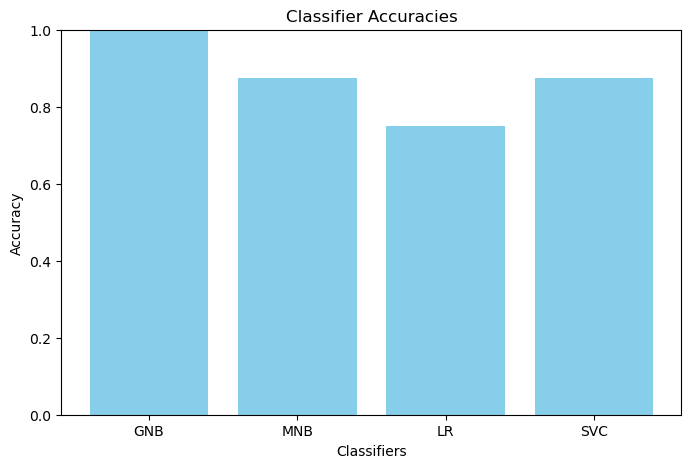

In [15]:
import matplotlib.pyplot as plt

classifiers = ['GNB', 'MNB', 'LR', 'SVC', 'LR']
accuracies = [gnb_accuracy, mnb_accuracy, lr_accuracy, svc_accuracy, lr_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracies, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.ylim(0, 1) 
plt.show()